In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import apriltag

In [2]:
from dt_apriltags import Detector

In [3]:
img = cv2.imread('test_image.png', cv2.IMREAD_GRAYSCALE)

In [4]:
at_detector = Detector(families='tag36h11',
                       nthreads=1,
                       quad_decimate=1.0,
                       quad_sigma=0.0,
                       refine_edges=1,
                       decode_sharpening=0.25,
                       debug=0)

In [5]:
tags = at_detector.detect(img, estimate_tag_pose=False, camera_params=None, tag_size=None)

In [6]:
color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

In [7]:
for tag in tags:
    for idx in range(len(tag.corners)):
        cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0))

    cv2.putText(color_img, str(tag.tag_id),
                org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=0.8,
                color=(0, 0, 255))

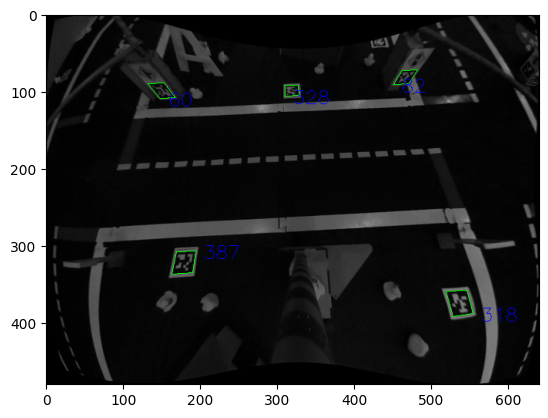

In [8]:
plt.imshow(color_img)

In [9]:
def detect_april_tags(video_path):
    # Create an AprilTag detector object
    detector = apriltag.Detector()

    # Open the video file
    cap = cv2.VideoCapture(video_path)

    while cap.isOpened():
        # Read a frame from the video
        ret, frame = cap.read()
        if not ret:
            break
        
        # Convert the frame to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect AprilTags in the frame
        detections = detector.detect(gray)

        # Draw bounding boxes around detected AprilTags
        for detection in detections:
            points = detection.corners.astype(int)
            cv2.polylines(frame, [points], True, (0, 255, 0), 2)

        # Display the frame with detected AprilTags
        cv2.imshow("AprilTag Detection", frame)

        # Exit on 'q' key press
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release video capture and close the window
    cap.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    video_path = "AprilTagTest.mkv"
    plt.imshow(detect_april_tags(video_path))


: 

: 